<font color = green>

# Support Vector Machine
</font>

<font color = green>

## Polynomial In Logistic Regression

</font>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 

<font color = green>

###  Additional functions for visualization
</font>



In [2]:
%matplotlib notebook

In [3]:
def plot_decision_boundary(clf, X_train, y_train, X_test=None, y_test= None, title=None, precision=0.05,plot_symbol_size = 50, ax= None,  is_extended=True):

    '''    
    Draws the binary decision boundary for X that is nor required additional features and transformation (like polynomial)
    '''
    # Create color maps - required by pcolormesh
    from matplotlib.colors import  ListedColormap
    colors_for_points = np.array(['grey', 'orange']) # neg/pos
    colors_for_areas = np.array(['grey', 'orange']) # neg/pos  # alpha is applied later 
    cmap_light = ListedColormap(colors_for_areas)
    

 
    
    mesh_step_size = precision #.01  # step size in the mesh
    if X_test is None or y_test is None:
        show_test= False
        X= X_train
    else:
        show_test= True
        X= np.concatenate([X_train,X_test], axis=0)
    x1_min, x1_max = X[:, 0].min() - .1, X[:, 0].max() + 0.1
    x2_min, x2_max = X[:, 1].min() - .1, X[:, 1].max() + 0.1
    # Create grids of pairs
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, mesh_step_size),
                         np.arange(x2_min, x2_max, mesh_step_size))
    # Flatten all samples 
    target_samples_grid= (np.c_[xx1.ravel(), xx2.ravel()])

    print ('Call prediction for all grid values (precision of drawing = {},\n you may configure to speed up e.g. precision=0.05)'.format(precision))
    Z = clf.predict(target_samples_grid)

    # Reshape the result to original meshgrid shape 
    Z = Z.reshape(xx1.shape)
    
    if ax:
        plt.sca(ax)
    
    # Plot all meshgrid prediction      
    plt.pcolormesh(xx1, xx2,Z, cmap = cmap_light, alpha=0.2)

    # Plot train set
    plt.scatter(X_train[:, 0], X_train[:, 1], s=plot_symbol_size, 
                c=colors_for_points[y_train.ravel()], edgecolor = 'black',alpha=0.6)
    # Plot test set
    if show_test:
        plt.scatter(X_test[:, 0], X_test[:, 1], marker='^', s=plot_symbol_size, 
                c=colors_for_points[y_test.ravel()],edgecolor = 'black',alpha=0.6)
    if  is_extended:
        # Create legend  
        import matplotlib.patches as mpatches # use to assign lavels for colored points 
        patch0 = mpatches.Patch(color=colors_for_points[0], label='negative')
        patch1 = mpatches.Patch(color=colors_for_points[1], label='positive')
        plt.legend(handles=[patch0, patch1])
    plt.title(title)
    if is_extended:
        plt.xlabel('feature 1')
        plt.ylabel('feature 2')
    else:
        plt.tick_params(
        top =False,
        bottom= False,
        left  = False,
        labelleft = False, 
        labelbottom = False
        )

def plot_decision_boundary_poly(clf, X_train, y_train, degree, X_test=None, y_test= None, title=None, precision=0.05,plot_symbol_size = 50, ax= None,  is_extended=True):

    '''    
    Draws the binary decision boundary for X that is nor required additional features and transformation (like polynomial)
    '''
    from sklearn.preprocessing import PolynomialFeatures
    poly = PolynomialFeatures(degree=degree,include_bias=False)
    
    # Create color maps - required by pcolormesh
    from matplotlib.colors import  ListedColormap    
    colors_for_points = np.array(['grey', 'orange']) # neg/pos
    colors_for_areas = np.array(['grey', 'orange']) # neg/pos  # alpha is applied later 
    cmap_light = ListedColormap(colors_for_areas)
    

 
    
    mesh_step_size = precision #.01  # step size in the mesh
    if X_test is None or y_test is None:
        show_test= False
        X= X_train
    else:
        show_test= True
        X= np.concatenate([X_train,X_test], axis=0)
    x1_min, x1_max = X[:, 0].min() - .1, X[:, 0].max() + 0.1
    x2_min, x2_max = X[:, 1].min() - .1, X[:, 1].max() + 0.1
    # Create grids of pairs
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, mesh_step_size),
                         np.arange(x2_min, x2_max, mesh_step_size))
    # Flatten all samples 
    target_samples_grid= (np.c_[xx1.ravel(), xx2.ravel()])
    target_samples_grid_poly = poly.fit_transform(target_samples_grid)
    print ('Call prediction for all grid values (precision of drawing = {},\n you may configure to speed up e.g. precision=0.05)'.format(precision))
    Z = clf.predict(target_samples_grid_poly)
    print ('Computing prediction completed.')
    # Reshape the result to original meshgrid shape 
    Z = Z.reshape(xx1.shape)
    
    if ax:
        plt.sca(ax)
    
    # Plot all meshgrid prediction      
    plt.pcolormesh(xx1, xx2,Z, cmap = cmap_light, alpha=0.2)

    # Plot train set
    plt.scatter(X_train[:, 0], X_train[:, 1], s=plot_symbol_size, 
                c=colors_for_points[y_train.ravel()], edgecolor = 'black',alpha=0.6)
    # Plot test set
    if show_test:
        plt.scatter(X_test[:, 0], X_test[:, 1], marker='^', s=plot_symbol_size, 
                c=colors_for_points[y_test.ravel()],edgecolor = 'black',alpha=0.6)
    if  is_extended:
        # Create legend  
        import matplotlib.patches as mpatches # use to assign lavels for colored points 
        patch0 = mpatches.Patch(color=colors_for_points[0], label='negative')
        patch1 = mpatches.Patch(color=colors_for_points[1], label='positive')
        plt.legend(handles=[patch0, patch1])
    plt.title(title)
    if is_extended:
        plt.xlabel('feature 1')
        plt.ylabel('feature 2')
    else:
        plt.tick_params(
        top =False,
        bottom= False,
        left  = False,
        labelleft = False, 
        labelbottom = False
        )

   
        
    
def plot_data_logistic_regression(X,y,legend_loc= None, title= None):
    '''
    :param X: 2 dimensional ndarray
    :param y:  1 dimensional ndarray. Use y.ravel() if necessary
    :return:
    '''

    positive_indices = (y == 1)
    negative_indices = (y == 0)
#     import matplotlib as mpl
    colors_for_points = ['grey', 'orange'] # neg/pos

    plt.scatter(X[negative_indices][:,0], X[negative_indices][:,1], s=40, c=colors_for_points [0], edgecolor = 'black', label='negative', alpha = 0.7)
    plt.scatter(X[positive_indices][:,0], X[positive_indices][:,1], s=40, c=colors_for_points [1], edgecolor = 'black',label='positive', alpha = 0.7)
    plt.title(title)
    plt.legend(loc= legend_loc)

def plot_multi_class_logistic_regression(X,y,dict_names=None, colors= None,  title =None):
    '''
    Draw the multi class samples of 2 features
    :param X: X 2 ndarray (m,2),
    :param y: vector (m,)
    :param dict_names: dict of values of y and names
    :return: None
    '''
    if not colors:
        colors_for_points = ['green','grey', 'orange', 'brown'] 
    else: 
         colors_for_points = colors 
            
    y_unique = list(set(y))

    for i in range (len(y_unique)):
        ind = y == y_unique[i] # vector

        if dict_names:
            plt.scatter(X[ind,0], X[ind,1], c=colors_for_points[i], s=40, label=dict_names[y_unique[i]],edgecolor='black', alpha=.7)
        else:
            plt.scatter(X[ind, 0], X[ind, 1], s=40, c=colors_for_points [i], edgecolor = 'black', alpha = 0.7)
    if title:
        plt.title(title)

    if dict_names:
        plt.legend(frameon=True)

def draw_linear_decision_boundaries_multiclass(clf,X,):
    colors=  ['green','grey', 'orange', 'brown'] 
    x_line = np.linspace(X[:,0].min(),X[:,0].max(), 100)
    for w, b, color in zip(clf.coef_, clf.intercept_, colors):
        # Since class prediction with a linear model uses the formula y = w_0 x_0 + w_1 x_1 + b,
        # and the decision boundary is defined as being all points with y = 0, to plot x_1 as a
        # function of x_0 we just solve w_0 x_0 + w_1 x_1 + b = 0 for x_1:
        y_line = -(x_line  * w[0] + b) / w[1]
        ind = (X[:,0].min()< x_line) & (x_line <X[:,0].max()) & (X[:,1].min()< y_line) & (y_line <X[:,1].max() )
        plt.plot(x_line[ind] , y_line[ind], '-', c=color, alpha=.8)


In [4]:
from sklearn.datasets import make_blobs

In [5]:
X_mk8, y_mk8 = make_blobs(n_samples = 200, n_features = 2, centers = 8, # centers impacts for y 
                       cluster_std = 1.3, random_state = 4)
y_train = y_mk8 % 2 # make it binary since make_blobs  with centers = 8 creates y in [0..7]

<IPython.core.display.Javascript object>


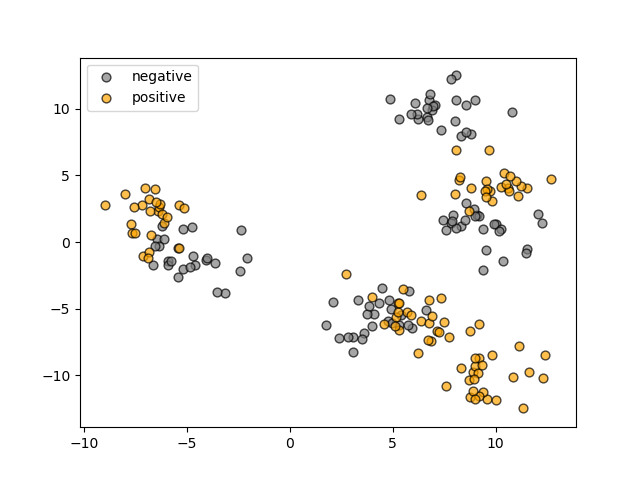

In [6]:
plt.figure()
plot_data_logistic_regression(X_mk8,y_train)

<font color = green>

###  Polynomial Features
</font>



In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

In [8]:
degree = 4
poly= PolynomialFeatures(degree=degree,include_bias=False) # default is True means to return the first feature of all 1 as for degree 0
X_train_poly= poly.fit_transform(X_mk8)

In [9]:
C = 0.1
clf = LogisticRegression(C=C).fit(X_train_poly, y_train)
accuracy = clf.score (X_train_poly, y_train)
print("train accuracy= {:.2%}".format(accuracy))

train accuracy= 92.50%


D:\DataScience\Anaconda\envs\DataScience\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<IPython.core.display.Javascript object>


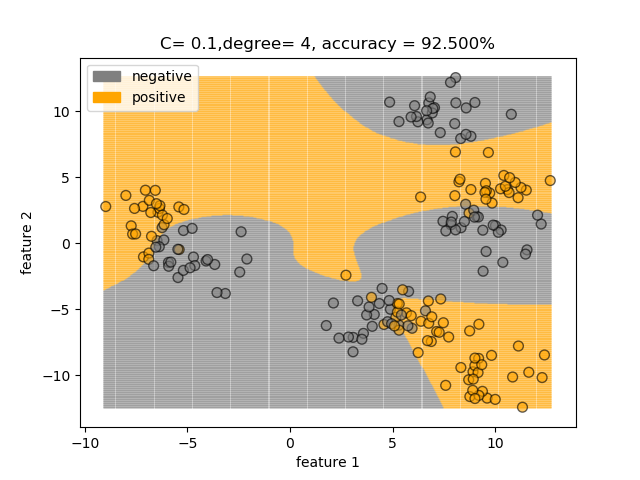

Call prediction for all grid values (precision of drawing = 0.05,
 you may configure to speed up e.g. precision=0.05)
Computing prediction completed.


In [10]:
plt.figure()
ax = plt.gca()
plot_decision_boundary_poly(clf, X_train_poly, y_train, degree= degree, ax = ax, precision= 0.05, title = 'C= {},degree= {}, accuracy = {:.3%}'.format(C, degree, accuracy))


<font color = green>

## Muticlass classification

</font>

<font color = green>

### Load fruits data set

</font>

In [11]:
import os
cwd= os.getcwd() # current working directory
path = os.path.join(cwd,'data') 
fn=  os.path.join(path , 'fruit_data_with_colors.txt')
df_fruits = pd.read_table(fn) 
X = df_fruits[['width', 'height']].values
y = df_fruits['fruit_label'].values
df_fruits.head(20)
fruits_dict = dict(zip(df_fruits['fruit_label'].unique(), df_fruits['fruit_name'].unique()))
fruits_dict

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

<IPython.core.display.Javascript object>


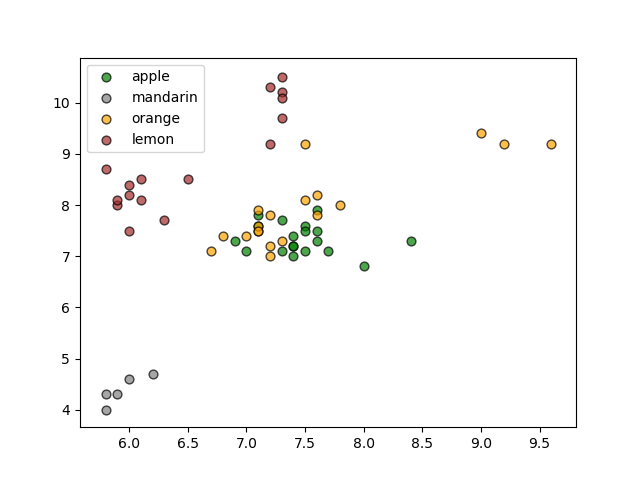

In [12]:
plt.figure() 
plot_multi_class_logistic_regression (X,y,dict_names=fruits_dict)

Accuracy=0.7288135593220338


D:\DataScience\Anaconda\envs\DataScience\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<IPython.core.display.Javascript object>


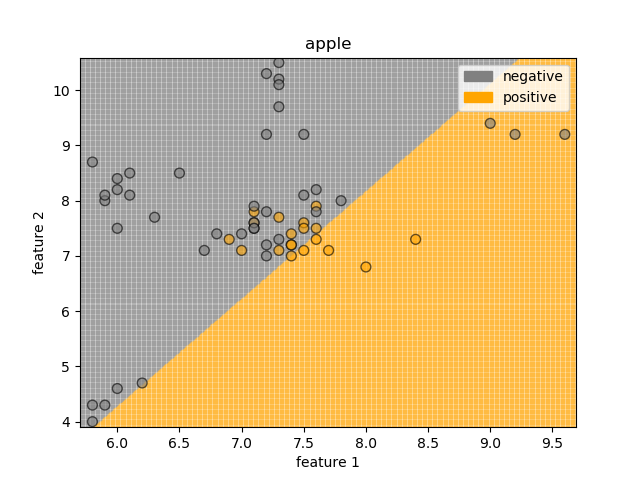

Call prediction for all grid values (precision of drawing = 0.01,
 you may configure to speed up e.g. precision=0.05)


In [13]:
fruit_label = 1
y_one_vs_all = y==fruit_label
y_one_vs_all = y_one_vs_all.astype(int)

clf = LogisticRegression(C=1000).fit (X, y_one_vs_all)
print ('Accuracy={}'. format (clf.score(X,y_one_vs_all)))
plt.figure()
plot_decision_boundary(clf, X, y_one_vs_all, title=fruits_dict[fruit_label], precision = 0.01)


<font color = green>

### Sklearn multiclass classificcation

</font>

In [14]:
print ('set(y) = {}'.format (set(y)))
print ('X.shape= {}\ny.shape = {}, '.format (X.shape, y.shape))
clf= LogisticRegression(C=1000).fit(X, y)
print ('Accuracy={}'. format (clf.score(X,y)))
clf.intercept_, clf.coef_

set(y) = {1, 2, 3, 4}
X.shape= (59, 2)
y.shape = (59,), 
Accuracy=0.847457627118644


D:\DataScience\Anaconda\envs\DataScience\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\DataScience\Anaconda\envs\DataScience\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


(array([-6.12485807,  8.10324695, -9.23278103, 21.65073969]),
 array([[  1.61099975,  -0.82707511],
        [  7.21779484, -10.2644604 ],
        [  1.23341426,  -0.0511218 ],
        [-13.80744571,   8.74015042]]))

<IPython.core.display.Javascript object>


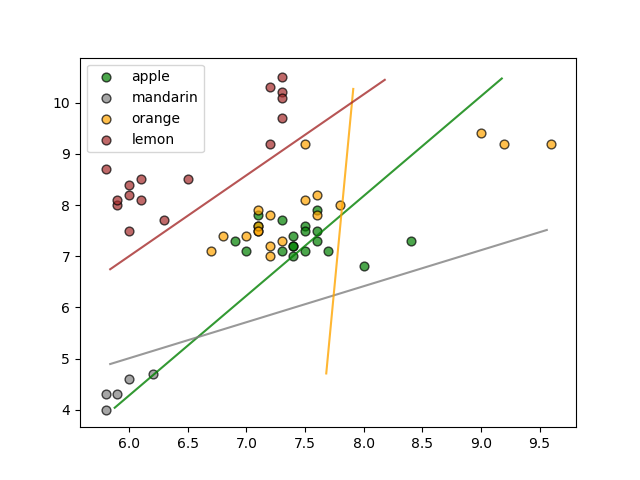

In [15]:
plt.figure() 
plot_multi_class_logistic_regression (X,y,dict_names=fruits_dict)
draw_linear_decision_boundaries_multiclass(clf,X)

<font color = green>

## Support Vector Machine  

</font>

<IPython.core.display.Javascript object>


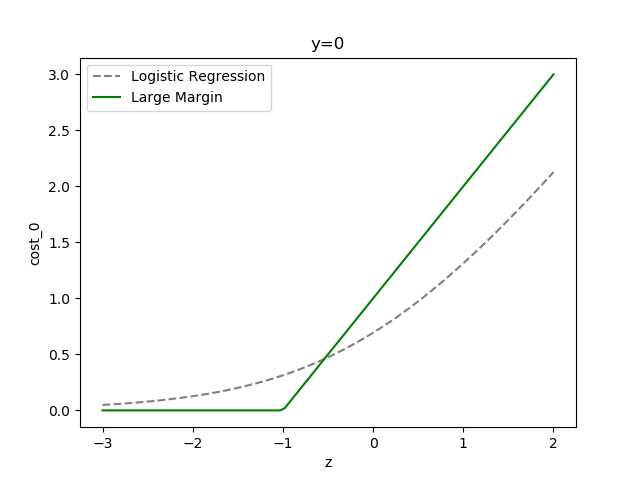

In [16]:
plt.figure()
x_line = np.linspace(-3, 2, 100)
x_line= x_line.reshape(-1,1)

from scipy.stats import logistic

cost_1_lr= -np.log (logistic.cdf(x_line)) 
cost_0_lr = -np.log (1-logistic.cdf(x_line)) 

cost_1 = np.apply_along_axis((lambda z: float(0 if z >= 1 else -z + 1)), 1, (x_line))
cost_0 = np.apply_along_axis((lambda z: float(0 if z <= -1 else z + 1)), 1, (x_line))

# plt.scatter(x_line, cost_0, marker = '.', c='green', label='cost_0')
plt.plot(x_line, cost_0_lr, '--', c= 'grey', label='Logistic Regression')
# plt.scatter(x_line, cost_1_lr, marker='o', c= 'grey', label='cost_1_logistic_regression')
plt.plot (x_line, cost_0, '-', c= 'green', label='Large Margin')
plt.xlabel('z')
plt.ylabel('cost_0')
plt.title ('y=0')
plt.legend()


<font color = green>

### Sklearn LinearSVC

</font>

In [17]:
from sklearn.svm import LinearSVC

train accuracy= 76.271%
b = [-1.26840322  0.86808135 -2.05584635  0.3774056 ]
w = [[ 0.41101851 -0.25629786]
 [ 0.82485222 -1.15347121]
 [ 0.32341331 -0.07011729]
 [-1.31526633  1.05048872]]


D:\DataScience\Anaconda\envs\DataScience\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


<IPython.core.display.Javascript object>


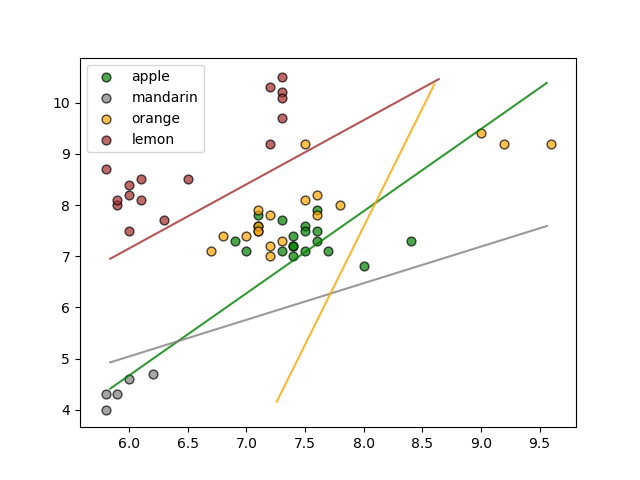

In [18]:
X = df_fruits[['width', 'height']].values
y = df_fruits['fruit_label'].values
clf = LinearSVC(C=1).fit(X, y)
print("train accuracy= {:.3%}".format(clf.score (X, y)))
print  ('b = {}\nw = {}'.format(clf.intercept_, clf.coef_))
fruits_dict = dict(zip(df_fruits['fruit_label'].unique(), df_fruits['fruit_name'].unique()))
plt.figure()
plot_multi_class_logistic_regression (X,y, dict_names = fruits_dict)
draw_linear_decision_boundaries_multiclass(clf,X)

<font color = green>

### Sklearn SVC RBF Kernel

</font>

In [19]:
from sklearn.svm import SVC

In [20]:
X_mk8, y_mk8 = make_blobs(n_samples = 200, n_features = 2, centers = 8, # centers impacts for y 
                       cluster_std = 1.3, random_state = 4)
y_train = y_mk8 % 2 # make it binary since make_blobs  with centers = 8 creates y in [0..7]

<IPython.core.display.Javascript object>


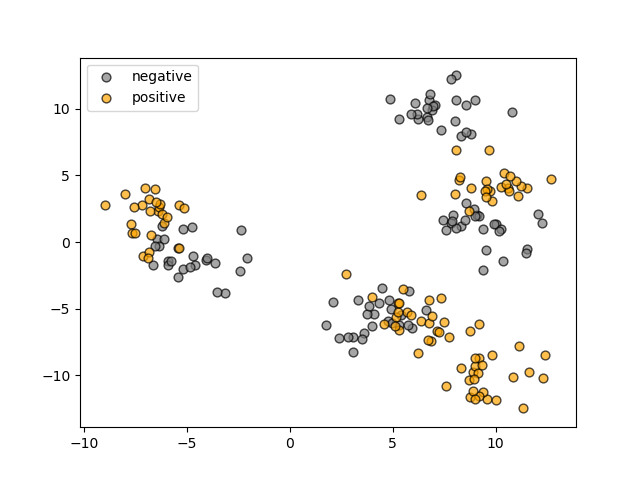

In [21]:
plt.figure()
plot_data_logistic_regression(X_mk8,y_train)

In [22]:
clf = LinearSVC(C=1).fit(X_mk8,y_train)
print("train accuracy= {:.3%}".format(clf.score (X_mk8,y_train)))

train accuracy= 55.500%


D:\DataScience\Anaconda\envs\DataScience\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [23]:
gamma=1
clf = SVC(C=1, gamma=gamma).fit(X_mk8,y_train) # rbf is default 
print("train accuracy= {:.3%}".format(clf.score (X_mk8,y_train)))

train accuracy= 94.000%


<IPython.core.display.Javascript object>


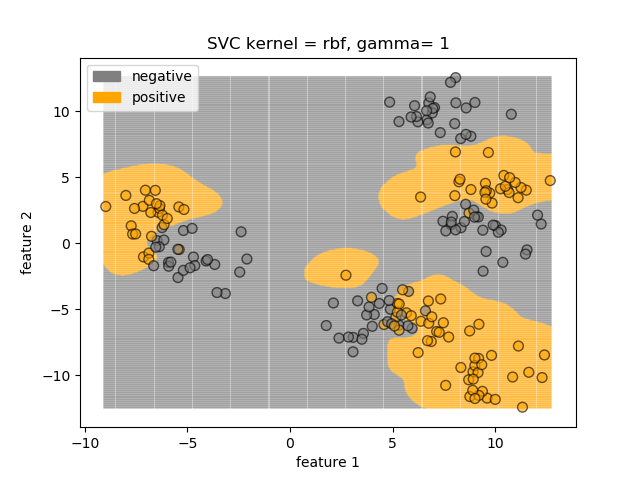

Call prediction for all grid values (precision of drawing = 0.05,
 you may configure to speed up e.g. precision=0.05)


In [24]:
plt.figure()
plot_decision_boundary(clf, X_mk8, y_train, title='SVC kernel = rbf, gamma= {}'.format(gamma), precision = 0.05)


<font color = green>

### Sklearn SVC Polynomial Kernel

</font>

In [25]:
degree= 3
clf = SVC(kernel= 'poly').fit(X_mk8,y_train) # default=3)
print("train accuracy= {:.3%}".format(clf.score (X_mk8,y_train)))

D:\DataScience\Anaconda\envs\DataScience\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


train accuracy= 72.500%


<IPython.core.display.Javascript object>


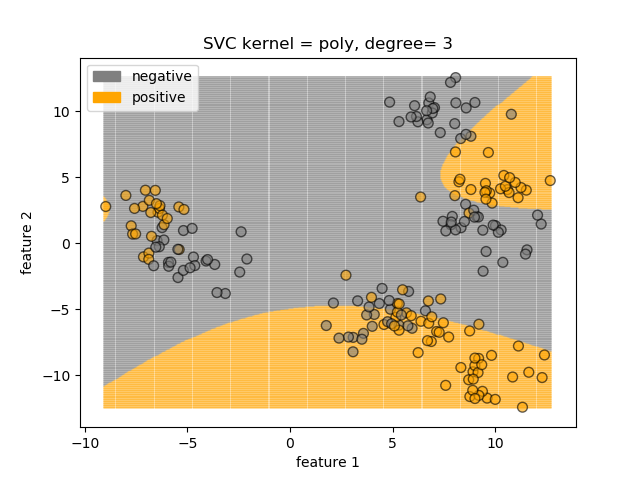

Call prediction for all grid values (precision of drawing = 0.05,
 you may configure to speed up e.g. precision=0.05)


In [26]:
plt.figure()
plot_decision_boundary(clf, X_mk8, y_train, title='SVC kernel = poly, degree= {}'.format(degree), precision = 0.05)

<IPython.core.display.Javascript object>


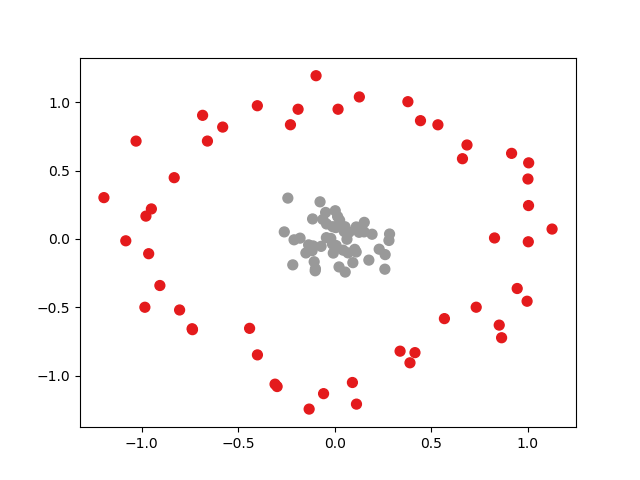

In [27]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Set1')

In [28]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

<IPython.core.display.Javascript object>


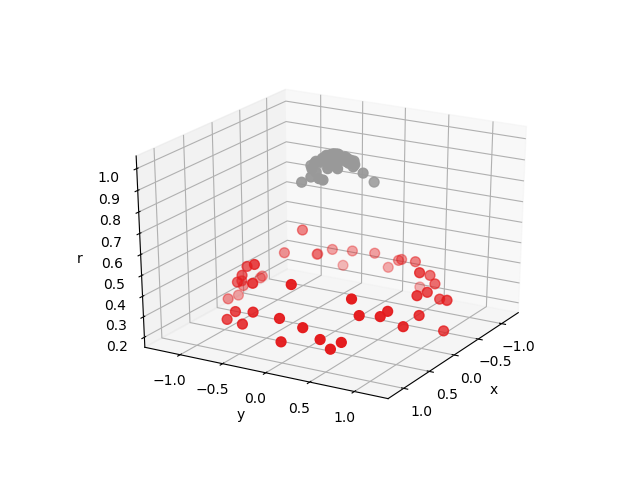

Text(0.5, 0, 'r')

In [29]:
r = np.exp(-(X ** 2).sum(1))

plt.figure()
ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='Set1')
ax.view_init(elev=25, azim=30)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')

<font color = green>

### Apply SVC to Cat/Non-Cat classification

</font>

<font color = green>

#### Load dataset

</font>

In [30]:
import h5py # common package to interact with a dataset that is stored on an H5 file.

In [31]:
def load_dataset():
    file_name=  os.path.join(path , 'train_catvnoncat.h5')
    train_dataset = h5py.File(file_name, "r")
    X_train = np.array(train_dataset["train_set_x"][:]) # your train set features
    Y_train = np.array(train_dataset["train_set_y"][:]) # your train set labels
    
    file_name=  os.path.join(path , 'test_catvnoncat.h5')
    test_dataset = h5py.File(file_name, "r")
    X_test = np.array(test_dataset["test_set_x"][:]) # your test set features
    Y_test = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = ['non-cat','cat']
    
    Y_train = Y_train.reshape(-1,1)
    Y_test = Y_test.reshape(-1,1)
    
    return X_train, Y_train, X_test, Y_test, classes

In [32]:
X_train,Y_train, X_test, Y_test, classes = load_dataset()
# Note : in case file not found, uncomment to print path in previous step and correct to necessary exrension

In [33]:
print ('X_train.shape= ',X_train.shape)
print ('X_test.shape= ',X_test.shape)
print ('Y_train.shape= ',Y_train.shape)
print ('Y_test.shape= ',Y_test.shape)

X_train.shape=  (209, 64, 64, 3)
X_test.shape=  (50, 64, 64, 3)
Y_train.shape=  (209, 1)
Y_test.shape=  (50, 1)


In [34]:
m_train, num_px,_,_ = X_train.shape
m_test =  X_test.shape[0]

In [35]:
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")


Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)


<font color = green>

#### Review some examples

</font>

<IPython.core.display.Javascript object>


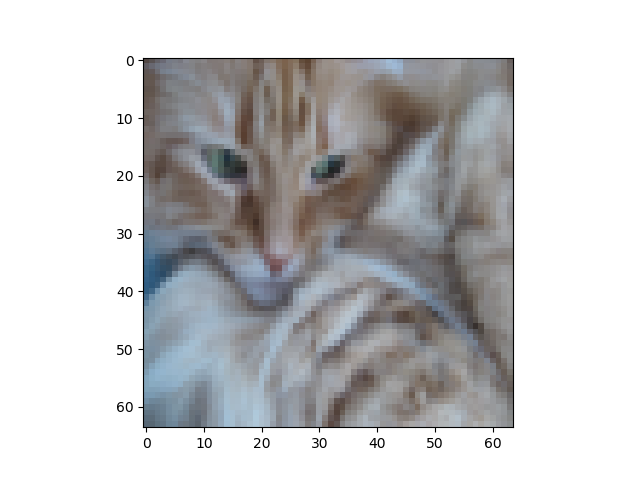

y = [1], it's a 'cat' picture.


In [36]:
# Example of a picture
index = 2
plt.figure()
plt.imshow(X_train[index])
print ("y = " + str(Y_train[index,:]) + ", it's a '" + classes[np.squeeze(Y_train[index,:])] +  "' picture.")

<IPython.core.display.Javascript object>


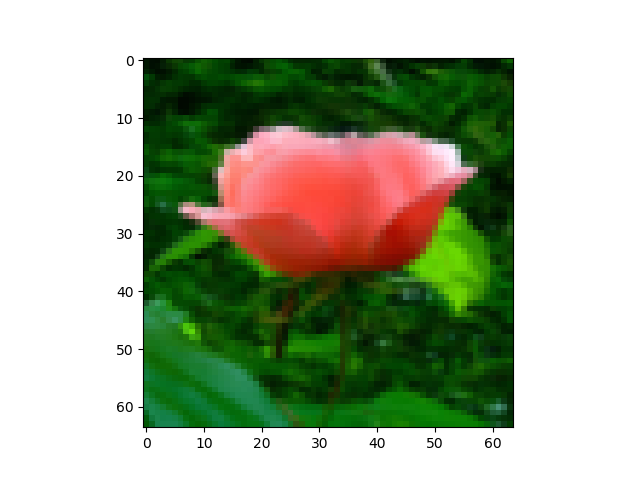

y = [0], it's a 'non-cat' picture.


In [37]:
index = 3
plt.figure()
plt.imshow(X_train[index])
print ("y = " + str(Y_train[index,:]) + ", it's a '" + classes[np.squeeze(Y_train[index,:])] +  "' picture.")

In [38]:
print ('Label 1 count:', np.sum(Y_train!=0))
print ('Label 0 count:', np.sum(Y_train==0))

Label 1 count: 72
Label 0 count: 137


<font color = green>

#### Flatten features

</font>

In [39]:
X_train_flatten = X_train.reshape(m_train, -1)
X_test_flatten =  X_test.reshape(m_test, -1)

In [40]:
print ("train_set_x_flatten shape: {}".format(X_train_flatten.shape))
print ("test_set_x_flatten shape: {}".format(X_test_flatten.shape))
print ("sanity check after reshaping: {}".format(X_train_flatten[0, :5]))

train_set_x_flatten shape: (209, 12288)
test_set_x_flatten shape: (50, 12288)
sanity check after reshaping: [17 31 56 22 33]


<font color = green>

#### Normalize features

</font>
To represent color images, the red, green and blue channels (RGB) must be specified for each pixel, and so the pixel value is actually a vector of three numbers ranging from 0 to 255.

For picture datasets, it is almost the same as MinMaxScaler  to just divide every row of the dataset by 255 (the maximum value of a pixel channel).

In [41]:
X_train_scaled = X_train_flatten/255.
X_test_scaled = X_test_flatten/255.

<font color = green>

###  Sklearn implementation
</font>



In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
y_train = np.squeeze(Y_train) # LogisticRegression requires 1d input for y
clf = LogisticRegression(C=.02).fit(X_train_scaled, y_train)

D:\DataScience\Anaconda\envs\DataScience\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<font color = green>

####  Logistic regression
</font>



In [44]:
print("train accuracy= {:.3%}".format(clf.score (X_train_scaled, y_train)))
y_test = np.squeeze(Y_test)
print("test accuracy= {:.3%}".format(clf.score (X_test_scaled, y_test)))

train accuracy= 95.694%
test accuracy= 74.000%


true value: 1 (cat)


<IPython.core.display.Javascript object>


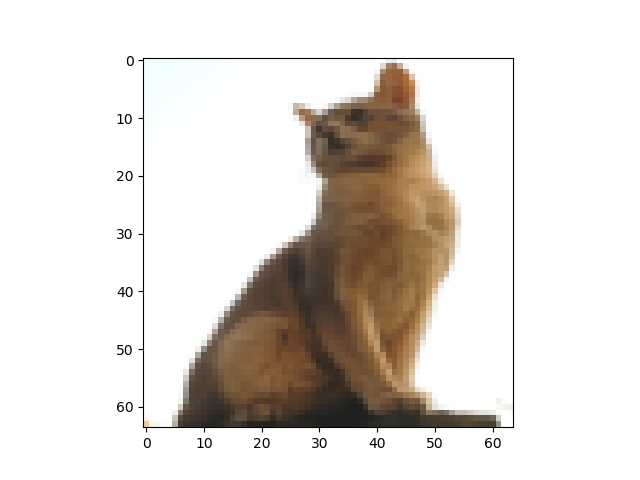

predicted y = 0 (non-cat)


In [45]:
# index = 6 is example of a picture that was wrongly classified.
index = 6
print ('true value: {} ({})'.format (y_test[index], classes[y_test[index]]))
plt.figure()
plt.imshow(X_test[index,:].reshape(num_px, num_px, 3))
x= X_test_scaled[index,:].reshape(1,-1)

print('predicted y = {} ({})'.
      format(np.squeeze(clf.predict(x)),classes[np.squeeze(clf.predict(x))]))

<font color = green>

####  SVC Polynomial Kernel
</font>



In [46]:
from sklearn.svm import SVC

In [47]:
clf_svm  = SVC (C=5000, kernel='poly', degree=3).fit (X_train_scaled, y_train)
print("train accuracy= {:.3%}".format(clf_svm.score (X_train_scaled, y_train)))
print("test accuracy= {:.3%}".format(clf_svm.score (X_test_scaled, y_test)))

D:\DataScience\Anaconda\envs\DataScience\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


train accuracy= 98.565%
test accuracy= 82.000%


<font color = green>

####  SVC RBF Kernel
</font>



In [48]:
clf_svm  = SVC (C=7, kernel='rbf', gamma=0.0013).fit (X_train_scaled, y_train)
print("train accuracy= {:.2%}".format(clf_svm.score (X_train_scaled, y_train)))
print("test accuracy= {:.2%}".format(clf_svm.score (X_test_scaled, y_test)))

train accuracy= 100.00%
test accuracy= 84.00%


*** 
<font color = green>

#  Home Task
</font>




***
<font color = green>

##  Sklearn SVM for Iris dataset
</font>



In [49]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X,y = load_iris(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2019)

In [50]:
clf_svm = SVC(kernel='linear').fit(X_train, y_train)
print("train accuracy= {:.3%}".format(clf_svm.score (X_train, y_train)))
print("test accuracy= {:.3%}".format(clf_svm.score (X_test, y_test)))

train accuracy= 98.214%
test accuracy= 100.000%


In [51]:
clf_svm = SVC(C=50, kernel='poly', degree=5, gamma='auto').fit(X_train, y_train)
print("train accuracy= {:.3%}".format(clf_svm.score (X_train, y_train)))
print("test accuracy= {:.3%}".format(clf_svm.score (X_test, y_test)))

train accuracy= 100.000%
test accuracy= 100.000%


In [52]:
clf_svm = SVC(C=500, kernel='rbf', gamma=0.001).fit(X_train, y_train)
print("train accuracy= {:.3%}".format(clf_svm.score (X_train, y_train)))
print("test accuracy= {:.3%}".format(clf_svm.score (X_test, y_test)))

train accuracy= 98.214%
test accuracy= 100.000%


***
<font color = green>

##  Spam/Non-spam classification
</font>




<font color = green>

###  Problem statement
</font>

Spam filter classifies emails into spam and non-spam email. 
For this task use SVMs to build your spam filter.
This is binary classification  - whether a given email, x, is spam (y = 1) or non-spam (y = 0).
In particular, you need to convert each email into a feature vector x. 
The dataset for this task is based on a a subset of the SpamAssassin Public Corpus.
For the purpose of this exercise, it will use the body of the email (excluding the email headers)


<font color = green>

###  Preprocessing mail
</font>

Before starting on a machine learning task, it is usually insightful to take a look at examples from the dataset. Below is a sample email that contains a URL, an email address (at the end), numbers, and dollar amounts. While many emails would contain similar types of entities (e.g., numbers, other URLs, or other email addresses), the specific entities (e.g., the specific URL or specific dollar amount) will be different in almost every email. Therefore, one method often employed in processing emails is to “normalize” these values, so that all URLs are treated the same, all numbers are treated the same, etc. For example, replace each URL in the email with the unique string “http_addr” to indicate that a URL was present.
This lets the spam classifier to make a classification decision based on whether any URL was present, rather than whether a specific URL was present. This typically improves the performance of a spam classifier, since spammers often randomize the URLs, and thus the odds of seeing any particular URL again in a new piece of spam is very small.


<font color = green>

### Reveiw sample mail 
</font>



In [53]:
def get_sample(fn):
    with open(fn, 'r') as f:
        content = f.read()
    return content
    
fn=  os.path.join(path , 'emailSample1.txt')
content = get_sample(fn)

<font color = green>

### Preprocessing and normalization steps
</font>

Preprocessing and normalization includes the following steps:
<ul>
<li> <b>Lower-casing</b>: The entire email is converted into lower case, so that captialization is ignored (e.g., IndIcaTE is treated the same as Indicate).
    
<li> <b>Stripping HTML</b>: All HTML tags are removed from the emails. Many emails often come with HTML formatting; we remove all the HTML tags, so that only the content remains.
<li> <b>Normalizing URLs</b>: All URLs are replaced with the text “httpaddr”.
<li> <b>Normalizing Email Addresses</b>: All email addresses are replaced
with the text “emailaddr”.
<li> <b>Normalizing Numbers</b>: All numbers are replaced with the text
“number”.
<li> <b>Normalizing Dollars</b>: All dollar signs ($) are replaced with the text
“dollar”.
<li> <b>Word Stemming</b>: Words are reduced to their stemmed form. For ex- ample, “discount”, “discounts”, “discounted” and “discounting” are all replaced with “discount”. Sometimes, the Stemmer actually strips o↵ additional characters from the end, so “include”, “includes”, “included”, and “including” are all replaced with “includ”.
<li> <b>Removal of non-words</b>: Non-words and punctuation have been re- moved. All white spaces (tabs, newlines, spaces) have all been trimmed to a single space character.
</ul>

<font color = green>

### Word tokenization
</font>


In [54]:
import re
import string

In [55]:
def word_tokeniize(content):
    '''
    content: str - body of mail 
    return: list of tokens (str) e.g. ['>', 'Anyone', 'knows', 'how', 'much', 'it', 'costs', 'to', 'host', 'a']
    '''
    # YOUR_CODE.  Split the content to tokens. You may need re.split()
    # START_CODE 
    tokens = re.sub('[$]','dollar ',content)
    tokens = [word.strip(string.punctuation) for word in tokens.split()]
    # END_CODE 
    
    return np.array(tokens)

<font color = blue >

### Check result

</font>


In [56]:
tokens  = word_tokeniize('''> Anyone knows how much it costs to host a web portal ?\n>\nWell, it depends on how many visitors you're expecting.\nThis can be anywhere from less than 10 bucks a month to a couple of $100. \nYou should checkout http://www.rackspace.com/ or perhaps Amazon EC2 \nif youre running something big..\n\nTo unsubscribe yourself from this mailing list, send an email to:\ngroupname-unsubscribe@egroups.com\n\n''')
tokens

array(['', 'Anyone', 'knows', 'how', 'much', 'it', 'costs', 'to', 'host',
       'a', 'web', 'portal', '', '', 'Well', 'it', 'depends', 'on', 'how',
       'many', 'visitors', "you're", 'expecting', 'This', 'can', 'be',
       'anywhere', 'from', 'less', 'than', '10', 'bucks', 'a', 'month',
       'to', 'a', 'couple', 'of', 'dollar', '100', 'You', 'should',
       'checkout', 'http://www.rackspace.com', 'or', 'perhaps', 'Amazon',
       'EC2', 'if', 'youre', 'running', 'something', 'big', 'To',
       'unsubscribe', 'yourself', 'from', 'this', 'mailing', 'list',
       'send', 'an', 'email', 'to', 'groupname-unsubscribe@egroups.com'],
      dtype='<U33')

<font color = blue >

### Expected output

</font>

`array(['>', 'Anyone', 'knows', 'how', 'much', 'it', 'costs', 'to', 'host',
       'a', 'web', 'portal', '?', '>', 'Well', 'it', 'depends', 'on',
       'how', 'many', 'visitors', "you're", 'expecting.', 'This', 'can',
       'be', 'anywhere', 'from', 'less', 'than', '10', 'bucks', 'a',
       'month', 'to', 'a', 'couple', 'of', '$100.', '', 'You', 'should',
       'checkout', 'http://www.rackspace.com/', 'or', 'perhaps', 'Amazon',
       'EC2', '', 'if', 'youre', 'running', 'something', 'big..', '',
       'To', 'unsubscribe', 'yourself', 'from', 'this', 'mailing', 'list',
       'send', 'an', 'email', 'to:', 'groupname-unsubscribe@egroups.com',
       '', ''], dtype='<U33')`

<font color = green>

### Lower case 
</font>


In [57]:
def lower_case(tokens):
    '''
    tokens: ndarray of str
    return: ndarray of tokens in lower case (str)
    '''
    # YOUR_CODE.  Make all tokens in lower case
    # START_CODE 
    tokens.tostring()
    tokens = np.char.lower(tokens)
    # END_CODE 
   
    return tokens

<font color = blue >

### Check result

</font>


In [58]:
tokens = lower_case(tokens)
tokens

array(['', 'anyone', 'knows', 'how', 'much', 'it', 'costs', 'to', 'host',
       'a', 'web', 'portal', '', '', 'well', 'it', 'depends', 'on', 'how',
       'many', 'visitors', "you're", 'expecting', 'this', 'can', 'be',
       'anywhere', 'from', 'less', 'than', '10', 'bucks', 'a', 'month',
       'to', 'a', 'couple', 'of', 'dollar', '100', 'you', 'should',
       'checkout', 'http://www.rackspace.com', 'or', 'perhaps', 'amazon',
       'ec2', 'if', 'youre', 'running', 'something', 'big', 'to',
       'unsubscribe', 'yourself', 'from', 'this', 'mailing', 'list',
       'send', 'an', 'email', 'to', 'groupname-unsubscribe@egroups.com'],
      dtype='<U33')

<font color = blue >

### Expected output

</font>

`array(['>', 'anyone', 'knows', 'how', 'much', 'it', 'costs', 'to', 'host',
       'a', 'web', 'portal', '?', '>', 'well', 'it', 'depends', 'on',
       'how', 'many', 'visitors', "you're", 'expecting.', 'this', 'can',
       'be', 'anywhere', 'from', 'less', 'than', '10', 'bucks', 'a',
       'month', 'to', 'a', 'couple', 'of', '$100.', '', 'you', 'should',
       'checkout', 'http://www.rackspace.com/', 'or', 'perhaps', 'amazon',
       'ec2', '', 'if', 'youre', 'running', 'something', 'big..', '',
       'to', 'unsubscribe', 'yourself', 'from', 'this', 'mailing', 'list',
       'send', 'an', 'email', 'to:', 'groupname-unsubscribe@egroups.com',
       '', ''], dtype='<U33')`

<font color = green>

### Normalize
</font>


In [59]:
def normalize_tokens (tokens):
    '''
    tokens: ndarry of str
    return: ndarry of tokens replaced with corresponding unified words
    '''
    
    # YOUR_CODE.      
        # Remove html and other tags
        # mark all numbers "number"      
        # mark all  urls as "httpaddr"
        # mark all emails as "emailaddr"
        # replace $ as "dollar"
        # get rid of any punctuation
        # Remove any non alphanumeric characters
   
    #  You may need re.sub()
        
    # START_CODE     
    tokens = [re.sub('(http|https)://[^\s]*','httpaddr', word) for word in tokens]  
    tokens = [re.sub('\S+@\w+\.\w+','emailaddr', word) for word in tokens] 
    tokens = [re.sub('(\d+)', 'number',word) for word in tokens]
    
    
    # END_CODE 

    return np.array(tokens)


<font color = blue >

### Check result

</font>


In [60]:
tokens = normalize_tokens(tokens)
tokens

array(['', 'anyone', 'knows', 'how', 'much', 'it', 'costs', 'to', 'host',
       'a', 'web', 'portal', '', '', 'well', 'it', 'depends', 'on', 'how',
       'many', 'visitors', "you're", 'expecting', 'this', 'can', 'be',
       'anywhere', 'from', 'less', 'than', 'number', 'bucks', 'a',
       'month', 'to', 'a', 'couple', 'of', 'dollar', 'number', 'you',
       'should', 'checkout', 'httpaddr', 'or', 'perhaps', 'amazon',
       'ecnumber', 'if', 'youre', 'running', 'something', 'big', 'to',
       'unsubscribe', 'yourself', 'from', 'this', 'mailing', 'list',
       'send', 'an', 'email', 'to', 'emailaddr'], dtype='<U11')

<font color = blue >

### Expected output

</font>

`array(['', 'anyone', 'knows', 'how', 'much', 'it', 'costs', 'to', 'host',
       'a', 'web', 'portal', '', '', 'well', 'it', 'depends', 'on', 'how',
       'many', 'visitors', 'youre', 'expecting', 'this', 'can', 'be',
       'anywhere', 'from', 'less', 'than', 'number', 'bucks', 'a',
       'month', 'to', 'a', 'couple', 'of', 'dollarnumber', '', 'you',
       'should', 'checkout', 'httpaddr', 'or', 'perhaps', 'amazon',
       'ecnumber', '', 'if', 'youre', 'running', 'something', 'big', '',
       'to', 'unsubscribe', 'yourself', 'from', 'this', 'mailing', 'list',
       'send', 'an', 'email', 'to', 'emailaddr', '', ''], dtype='<U12')`

<font color = green>

### Remove zero length tokens
</font>


In [61]:
def filter_short_tokens (tokens):
    '''
    tokens: ndarry of str
    return: ndarry of filtered tokens (str)
    '''
    original_tokens_len = len(tokens)
    
    # YOUR_CODE. Keep only tokens that lenght >0  
    # START_CODE 
    tokens = np.delete(tokens, np.where([len(word)==0 for word in tokens]))
    # END_CODE     
   
    print ('Original len= {}\nRemaining len= {}'.format(original_tokens_len, len(tokens)))    
    
    return tokens


<font color = blue >

### Check result

</font>


In [62]:
tokens = filter_short_tokens(tokens)
tokens

Original len= 65
Remaining len= 62


array(['anyone', 'knows', 'how', 'much', 'it', 'costs', 'to', 'host', 'a',
       'web', 'portal', 'well', 'it', 'depends', 'on', 'how', 'many',
       'visitors', "you're", 'expecting', 'this', 'can', 'be', 'anywhere',
       'from', 'less', 'than', 'number', 'bucks', 'a', 'month', 'to', 'a',
       'couple', 'of', 'dollar', 'number', 'you', 'should', 'checkout',
       'httpaddr', 'or', 'perhaps', 'amazon', 'ecnumber', 'if', 'youre',
       'running', 'something', 'big', 'to', 'unsubscribe', 'yourself',
       'from', 'this', 'mailing', 'list', 'send', 'an', 'email', 'to',
       'emailaddr'], dtype='<U11')

<font color = blue >

### Expected output

</font>

`Original len= 69
Remaining len= 61
array(['anyone', 'knows', 'how', 'much', 'it', 'costs', 'to', 'host', 'a',
       'web', 'portal', 'well', 'it', 'depends', 'on', 'how', 'many',
       'visitors', 'youre', 'expecting', 'this', 'can', 'be', 'anywhere',
       'from', 'less', 'than', 'number', 'bucks', 'a', 'month', 'to', 'a',
       'couple', 'of', 'dollarnumber', 'you', 'should', 'checkout',
       'httpaddr', 'or', 'perhaps', 'amazon', 'ecnumber', 'if', 'youre',
       'running', 'something', 'big', 'to', 'unsubscribe', 'yourself',
       'from', 'this', 'mailing', 'list', 'send', 'an', 'email', 'to',
       'emailaddr'], dtype='<U12')`

<font color = green>

### Stem tokens
</font>


In [63]:
from nltk.stem import PorterStemmer

In [64]:
def stem_tokens(tokens):
    '''
    tokens: ndarry of str
    return: ndarry of stemmed tokens e.g. array(['anyon', 'know', 'how', 'much', 'it', 'cost', 'to', 'host', 'a',
       'web', 'portal', 'well', 'it', 'depend', 'on', 'how', 'mani']...
    '''
    # YOUR_CODE. replace the tokens by stemmed form. You may need PorterStemmer.stem() 
    # START_CODE 
    stemmer = PorterStemmer()
    tokens = np.array([stemmer.stem(word) for word in tokens])
    # END_CODE     
   
    return tokens

<font color = blue >

### Check result

</font>


In [65]:
tokens = stem_tokens(tokens)
tokens

array(['anyon', 'know', 'how', 'much', 'it', 'cost', 'to', 'host', 'a',
       'web', 'portal', 'well', 'it', 'depend', 'on', 'how', 'mani',
       'visitor', "you'r", 'expect', 'thi', 'can', 'be', 'anywher',
       'from', 'less', 'than', 'number', 'buck', 'a', 'month', 'to', 'a',
       'coupl', 'of', 'dollar', 'number', 'you', 'should', 'checkout',
       'httpaddr', 'or', 'perhap', 'amazon', 'ecnumb', 'if', 'your',
       'run', 'someth', 'big', 'to', 'unsubscrib', 'yourself', 'from',
       'thi', 'mail', 'list', 'send', 'an', 'email', 'to', 'emailaddr'],
      dtype='<U10')

<font color = blue >

### Expected output

</font>

`array(['anyon', 'know', 'how', 'much', 'it', 'cost', 'to', 'host', 'a',
       'web', 'portal', 'well', 'it', 'depend', 'on', 'how', 'mani',
       'visitor', 'your', 'expect', 'thi', 'can', 'be', 'anywher', 'from',
       'less', 'than', 'number', 'buck', 'a', 'month', 'to', 'a', 'coupl',
       'of', 'dollarnumb', 'you', 'should', 'checkout', 'httpaddr', 'or',
       'perhap', 'amazon', 'ecnumb', 'if', 'your', 'run', 'someth', 'big',
       'to', 'unsubscrib', 'yourself', 'from', 'thi', 'mail', 'list',
       'send', 'an', 'email', 'to', 'emailaddr'], dtype='<U10')`

<font color = green>

### Vocabulary
</font>

Ususally vocabulary is built from the top most frequent tokens within all available training set.
For this task it is already prepared and provided in the `vocab.txt`

In [66]:
def get_vocabulary(fn):
    '''
    fn: str - full path to file 
    return: ndarray of str e.g. array(['aa', 'ab', 'abil', ..., 'zdnet', 'zero', 'zip'], dtype=object)
    '''
    vocab_list = pd.read_table(fn, header=None)
    vocab = np.array(vocab_list)[:,1] # first columns is index, select only words column  
    print ('len(vocab)= {:,}'.format(len(vocab)))
    return vocab

fn=  os.path.join(path , 'vocab.txt')
vocab = get_vocabulary(fn)
vocab

len(vocab)= 1,899


array(['aa', 'ab', 'abil', ..., 'zdnet', 'zero', 'zip'], dtype=object)

<font color = green>

### Feature reresentation
</font>

Every word in vocabulary is the feature of the mail - 1 is the word in in the mail and 0 otherwise. 
Thus every mail can be represented as the binary array of fixed length - number of words in vocabulary.

In [67]:
def represent_features(tokens,vocab):
    '''
    tokens: ndarry of str
    tokens: ndarry of str
    return: ndarry of binary values 1 if word from vocabulary is in mail 0 otherwise
    '''
    # YOUR_CODE. Compute the array with 1/0 corresponding to is word from vocabulary in mail 
    # START_CODE 
    tokens_represented = np.array([int(np.isin(word, tokens)) for word in vocab])
    # END_CODE     

    print ('{} word(s) from vocab are in the tokens.'.format(np.sum(tokens_represented)))

   
    return tokens_represented


<font color = blue >

### Check result

</font>


In [68]:
tokens_represented = represent_features(tokens, vocab)
tokens_represented

44 word(s) from vocab are in the tokens.


array([0, 0, 0, ..., 0, 0, 0])

<font color = blue >

### Expected output

</font>

`44 word(s) from vocab are in the tokens.
array([0, 0, 0, ..., 0, 0, 0])`

<font color = green>

### Composing all steps of preprocessing 
</font>

Every word in vocabulary is the feature of the mail - 1 is the word in in the mail and 0 otherwise. 
Thus every mail can be represented as the binary array of fixed length - number of words in vocabulary.

In [69]:
def preprocess (content,vocab):
    '''
    content: str - body of mail 
    vocab: ndarray of str - list of considered words 
    '''
    # YOUR_CODE. Compute the array with 1/0 corresponding to is word from vocabulary in mail 
    # START_CODE 

    # tokenize content    
    tokens  = word_tokeniize(content)
    original_tokens_len = len(tokens)
    # make lower case
    tokens = lower_case(tokens)

    # normalize tokens
    tokens = normalize_tokens(tokens)

    # remove zero words
    tokens = filter_short_tokens(tokens)
    
    # stem words
    tokens = stem_tokens(tokens)
    
    # convert to binary array of features  
    tokens_represented = represent_features(tokens,vocab)
    # END_CODE     
    
    return tokens_represented

<font color = blue >

### Check result

</font>


In [70]:
preprocess (content,vocab)

Original len= 65
Remaining len= 62
44 word(s) from vocab are in the tokens.


array([0, 0, 0, ..., 0, 0, 0])

<font color = blue >

### Expected output

</font>

`Original len= 69
Remaining len= 61
44 word(s) from vocab are in the tokens.
array([0, 0, 0, ..., 0, 0, 0])`

<font color = green>

### Training and test sets
</font>

All mails for training are preprocessed the same way as performed for sample above. 
The training set (array of feature representation) is provided in the `spamTrain.mat`
The corresponding test set is provided in the `spamTest.mat`

In [71]:
from scipy.io import loadmat

In [72]:
fn=  os.path.join(path , 'spamTrain.mat')

mat= loadmat(fn)
X_train= mat['X']
y_train= mat['y'].ravel()

print ('X_train.shape= {}',X_train.shape)
print ('y_train.shape= {}',y_train.shape)

fn=  os.path.join(path , 'spamTest.mat')
mat= loadmat(fn)
X_test = mat['Xtest']
y_test = mat['ytest'].ravel() 

print ('X_test.shape= {}',X_test.shape)
print ('y_test.shape= {}',y_test.shape)
index = 0 
print ('Sample with index  ={}: \n{}'.format(index, X_train[index]))


X_train.shape= {} (4000, 1899)
y_train.shape= {} (4000,)
X_test.shape= {} (1000, 1899)
y_test.shape= {} (1000,)
Sample with index  =0: 
[0 0 0 ... 0 0 0]


<font color = green>

### Training  the model
</font>


In [73]:
from sklearn.svm import SVC 
from sklearn.svm import LinearSVC

In [74]:
C = .1
clf= LinearSVC(C=C)
clf.fit(X_train,y_train)
print ('Score train= {}'.format(clf.score(X_train,y_train)))
print ('Score test= {}'.format(clf.score(X_test,y_test)))

Score train= 0.99975
Score test= 0.992


<font color = green>

### Determining most spam contributors
</font>


In [75]:
# print('clf.intercept_={}'.format(clf.intercept_))
# print ('clf.coef_={}'.format(clf.coef_))

# YOUR_CODE. Compute top 20 largest coeficients and return the corresponding 20 words from vocabulary
# START_CODE 
top_spam_contributors =  vocab[clf.coef_.argsort()[0][:-21:-1]]
# END_CODE    

<font color = blue >

### Check result

</font>


In [76]:
print (top_spam_contributors)

['our' 'remov' 'click' 'basenumb' 'guarante' 'visit' 'bodi' 'will'
 'numberb' 'price' 'dollar' 'nbsp' 'below' 'lo' 'most' 'send' 'dollarnumb'
 'credit' 'wi' 'hour']


<font color = blue >

### Expected output

</font>

`['our' 'remov' 'click' 'basenumb' 'guarante' 'visit' 'bodi' 'will'
 'numberb' 'price' 'dollar' 'nbsp' 'below' 'lo' 'most' 'send' 'dollarnumb'
 'credit' 'wi' 'hour']`

<font color = green>

### Use model for prediction 
</font>


In [77]:
for sfn in [ 'emailSample1.txt', 'emailSample2.txt', 'spamSample1.txt', 'spamSample2.txt']:
    fn=  os.path.join(path,sfn)    
    content = get_sample(fn)
    
    # YOUR_CODE.  Preprocess the sample and get prediction 0 or 1 (1 is spam)
    # START_CODE 
    prediction = int(clf.predict(preprocess(content,vocab).reshape(1,-1)))
    # END_CODE    
    print ('{} is {}\n'.format(sfn, ('Not Spam','Spam')[prediction]))

print ('Latter sample:\n{1}\n{0}\n{1}'.format(content, '='*50))

Original len= 65
Remaining len= 62
44 word(s) from vocab are in the tokens.
emailSample1.txt is Not Spam

Original len= 227
Remaining len= 222
121 word(s) from vocab are in the tokens.
emailSample2.txt is Not Spam

Original len= 101
Remaining len= 100
46 word(s) from vocab are in the tokens.
spamSample1.txt is Spam

Original len= 35
Remaining len= 32
18 word(s) from vocab are in the tokens.
spamSample2.txt is Spam

Latter sample:
Best Buy Viagra Generic Online

Viagra 100mg x 60 Pills $125, Free Pills & Reorder Discount, Top Selling 100% Quality & Satisfaction guaranteed!

We accept VISA, Master & E-Check Payments, 90000+ Satisfied Customers!
http://medphysitcstech.ru





<font color = blue >

### Expected output

</font>

`Original len= 69
Remaining len= 61
44 word(s) from vocab are in the tokens.
emailSample1.txt is Not Spam`

`Original len= 247
Remaining len= 222
122 word(s) from vocab are in the tokens.
emailSample2.txt is Not Spam`

`Original len= 141
Remaining len= 97
46 word(s) from vocab are in the tokens.
spamSample1.txt is Spam`

`Original len= 39
Remaining len= 31
18 word(s) from vocab are in the tokens.
spamSample2.txt is Spam`

`Latter sample:`

`==================================================`

`Best Buy Viagra Generic Online`

`Viagra 100mg x 60 Pills $125, Free Pills & Reorder Discount, Top Selling 100\% Quality & Satisfaction guaranteed!`

`We accept VISA, Master & E-Check Payments, 90000+ Satisfied Customers!
http://medphysitcstech.ru`


`==================================================`

<font color = green>

# Congratulation!
</font>

Now you know how to build Spam/Non-Spam classifier

